In [1]:
!pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



                                              0.0/85.4 kB ? eta -:--:--
     --------------                           30.7/85.4 kB ? eta -:--:--
     --------------                           30.7/85.4 kB ? eta -:--:--
     -------------------------------------- 85.4/85.4 kB 601.4 kB/s eta 0:00:00


In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

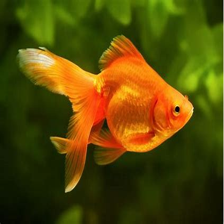

In [5]:
gf=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gf

In [6]:
gf=np.array(gf)/255.0
gf.shape

(224, 224, 3)

In [7]:
result=classifier.predict(gf[np.newaxis,...])

1/1 [==============================] - 2s 2s/step


In [8]:
result

array([[ 0.21169525,  2.47809   , 10.067986  , ..., -1.3082415 ,
        -0.09542671, -0.2853478 ]], dtype=float32)

In [9]:
predicted_label=np.argmax(result)
predicted_label

2

In [14]:
# Loading the flower dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 170s 1us/step


In [16]:
data_dir #This is a string path, we have to convert it into windows path

'.\\datasets\\flower_photos'

In [17]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [18]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [19]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [20]:
flowers_images_dict['roses']

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
 WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
 WindowsPath('datasets/flower_photos/

In [21]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [23]:
img= cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape


(240, 179, 3)

Every image is of different shape, so we have to resize the images to feed into the model

In [24]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [25]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [26]:
X

[array([[[ 0, 15,  6],
         [ 0, 15,  6],
         [ 0, 16,  7],
         ...,
         [24, 51, 31],
         [25, 52, 32],
         [26, 53, 33]],
 
        [[ 8, 22, 14],
         [ 8, 22, 14],
         [ 7, 21, 14],
         ...,
         [21, 47, 31],
         [24, 49, 34],
         [25, 51, 35]],
 
        [[12, 22, 15],
         [12, 22, 15],
         [11, 22, 14],
         ...,
         [21, 43, 31],
         [24, 46, 33],
         [26, 48, 36]],
 
        ...,
 
        [[17, 29, 25],
         [14, 25, 20],
         [13, 22, 15],
         ...,
         [ 2, 11,  2],
         [ 0,  7,  1],
         [ 0,  4,  0]],
 
        [[19, 30, 28],
         [18, 28, 25],
         [16, 25, 19],
         ...,
         [ 2, 10,  2],
         [ 1,  8,  2],
         [ 0,  7,  2]],
 
        [[ 9, 19, 19],
         [15, 23, 22],
         [19, 27, 24],
         ...,
         [ 1, 11,  2],
         [ 2, 10,  3],
         [ 3, 11,  4]]], dtype=uint8),
 array([[[11, 17, 16],
         [15, 18, 1

In [27]:
y[:5]

[0, 0, 0, 0, 0]

In [28]:
X=np.array(X)
y=np.array(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
X[0].shape

(224, 224, 3)

In [32]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [33]:
image_labels=[]
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [35]:
#Taking the freezed model from mobileNet so that we can specify our last layer
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

Mentioning trainable=False is very important as we don't want to changed the weights of the pre-trained model (freezed model)

In [37]:
num_of_flowers = 5

#Adding that extra last layer so that our prediction can be achieved

model = tf.keras.Sequential([
  pretrained_model_without_top_layer, #Original pre-trained model
  tf.keras.layers.Dense(num_of_flowers) #Custom output layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [38]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 89s 836ms/step - loss: 0.7683 - acc: 0.7235
Epoch 2/5
86/86 [==============================] - 70s 818ms/step - loss: 0.4052 - acc: 0.8597
Epoch 3/5
86/86 [==============================] - 71s 825ms/step - loss: 0.3201 - acc: 0.8964
Epoch 4/5
86/86 [==============================] - 68s 789ms/step - loss: 0.2707 - acc: 0.9073
Epoch 5/5
86/86 [==============================] - 66s 766ms/step - loss: 0.2283 - acc: 0.9320


In [40]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 23s 735ms/step - loss: 0.3634 - acc: 0.8758


[0.3633776307106018, 0.8758170008659363]

In [43]:
y_pred=model.predict(X_test_scaled)

29/29 [==============================] - 21s 738ms/step


In [50]:
y_classes_pred=[np.argmax(i) for i in y_pred]
y_classes_pred[:10]

[1, 1, 2, 4, 2, 3, 4, 0, 0, 4]

In [45]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

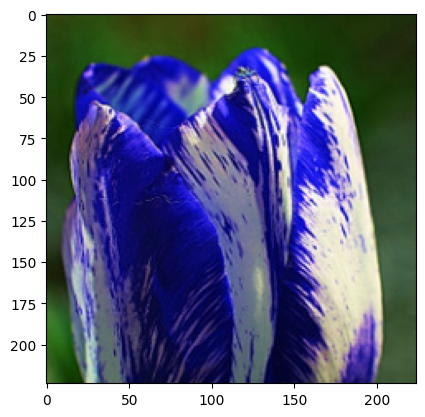

In [52]:
plt.imshow(X_test_scaled[9])